In [66]:
% matplotlib inline
import pandas as pd
import os
import datashader as ds
import datashader.transfer_functions as tf
import folium

In [58]:
# Load from HDF5 file

project = os.path.realpath('./..')
datadir = os.path.join(project, 'data')

with pd.HDFStore(os.path.join(datadir, 'results.h5')) as store:
    results = store.results

In [3]:
results.head()

,lat,lng,text,timeStamp,user_id,mb_cluster,db_cluster,cluster
id,,,,,,,,
377652254096228352,37.446100,-121.883557,@Tanner_Cortez hey checkout the website: http:...,2013-09-11 04:38:08,224874450,33,-1.0,NaN
377652262325456897,37.356131,-121.842867,i laugh a lot with that line,2013-09-11 04:38:10,54351774,22,-1.0,NaN
377652264682655744,37.364664,-122.009629,sons of anarchy is back on woop woop,2013-09-11 04:38:11,343219606,21,-1.0,NaN
377652271116722176,37.382600,-121.995000,Drinking a Fresh Squeezed IPA by @deschutesbee...,2013-09-11 04:38:12,1569395935,21,-1.0,NaN
377652275147444224,37.756149,-122.152813,I have 8 am classes this quarter ... I need to...,2013-09-11 04:38:13,399164195,84,0.0,84.0


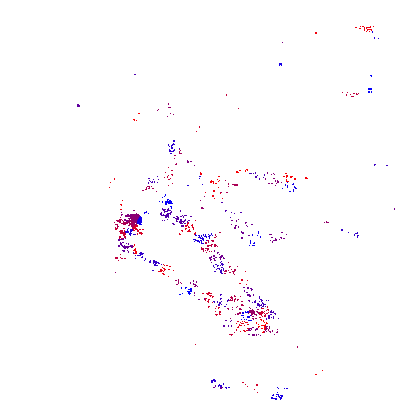

In [8]:
# Visualize points with datashader
cvs = ds.Canvas(plot_width=400, plot_height=400)
agg = cvs.points(results, 'lng', 'lat', ds.mean('cluster'))
tf.interpolate(agg, cmap=['blue', 'red'])

In [40]:
df = results[results['text'].str.contains("Berkeley")]

In [107]:
df.cluster.value_counts().head(10)

3.03     288
3.04     286
3.08     172
49.00     34
3.16      23
3.18      14
3.09      13
3.06      12
6.00       9
50.01      7
Name: cluster, dtype: int64

In [101]:
berkeley = results[results.cluster == 3.04]
print len(berkeley)

4609


In [108]:
map_data = folium.Map(location=[37.792895, -122.409800])

for index, series in berkeley.head(500).iterrows():
    folium.Marker([series['lat'], series['lng']]).add_to(map_data)
    
map_data.save('map.html')

In [109]:
%%HTML
<iframe width="100%" height="500" src="map.html"></iframe>